In [1]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2024-11-02 14:27:46--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ied22o8pntppl24qr84vy/dataset.zip?rlkey=9e4cnwq83zhgrhw1g0zrkw275&dl=0 [following]
--2024-11-02 14:27:46--  https://www.dropbox.com/scl/fi/ied22o8pntppl24qr84vy/dataset.zip?rlkey=9e4cnwq83zhgrhw1g0zrkw275&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc02f4ff654ea9c0bd0ff2cb31b9.dl.dropboxusercontent.com/cd/0/inline/CdmMxcm21C9x6ISSIcr5i4i0PyLX40J9fVgQdc5_c13GBPARbs6xfU4EKkK6wNThUvjeXT1hUOASbnNnGRFulc91O2FbDCzuusqFxuyW859o0CsCm5pKZD6qubDa7An4hLN-_mA_NUbm1fteF76zSxzK/file# [following]
--2024-11-02 14:27:47--  https://uc02f4ff654ea9c0bd0ff2cb31b9.dl.dropboxusercontent.com/c

In [2]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img # Changed import path to tensorflow.keras.preprocessing.image
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input  # Changed import path to tensorflow.keras.applications.mobilenet
from tensorflow.keras.losses import categorical_crossentropy # Changed import path to tensorflow.keras.losses

In [6]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [11]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [12]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


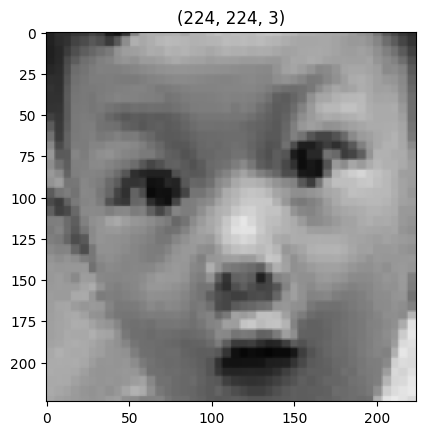

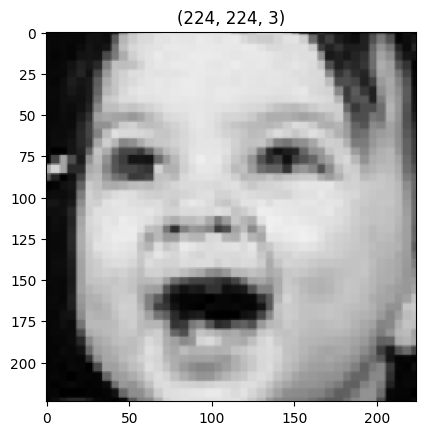

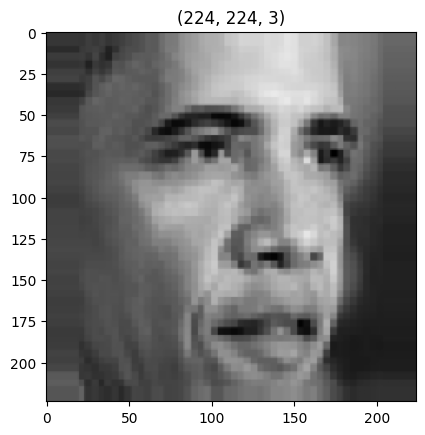

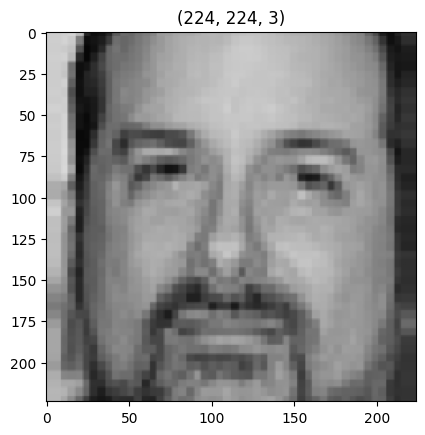

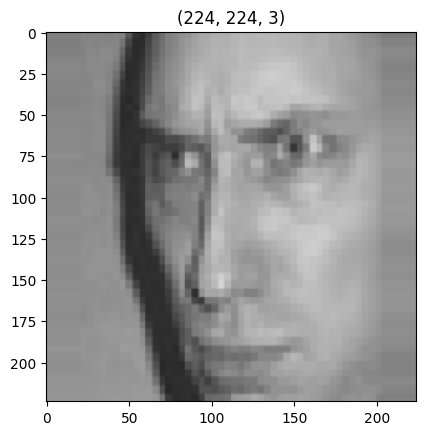

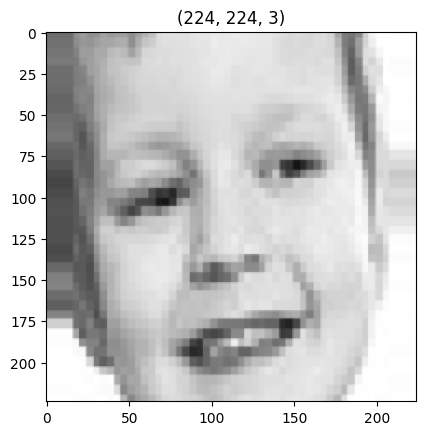

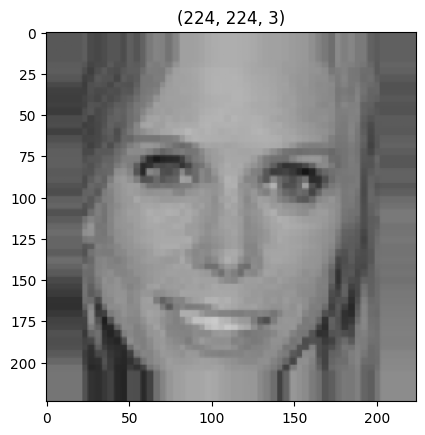

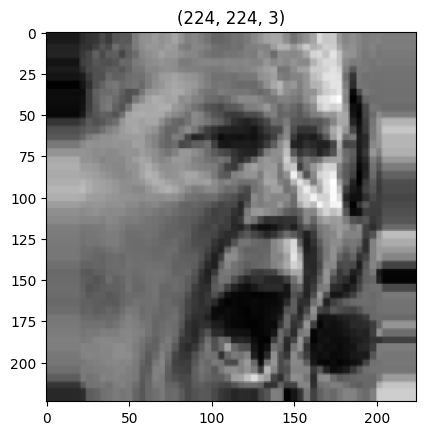

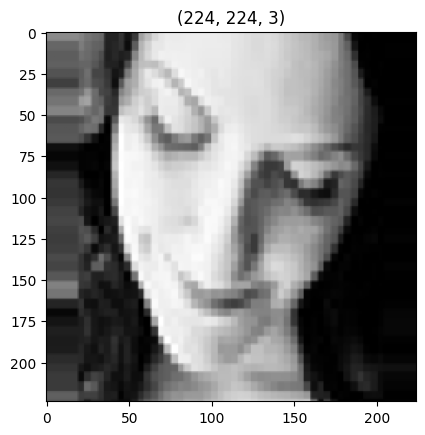

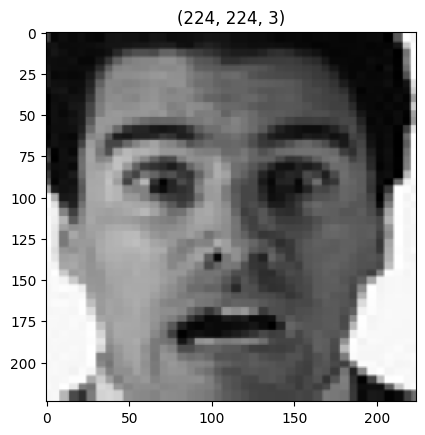

In [13]:
# to visualize the images in the traing data denerator

# Use __next__() or next() instead of .next() to fetch the next batch
t_img , label = next(train_data) # Or: t_img, label = train_data.__next__()


#-----------------------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

In [15]:
# model check point
mc = ModelCheckpoint(filepath="best_model.keras", # Changed file extension to '.keras'
                     monitor= 'val_accuracy',
                     verbose= 1,
                     save_best_only= True,
                     mode = 'auto')

In [17]:
# Replace fit_generator with fit
hist = model.fit(train_data,
                   steps_per_epoch=10,
                   epochs=30,
                   validation_data=val_data,
                   validation_steps=8,
                   callbacks=[es, mc])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1693 - loss: 15.8310
Epoch 1: val_accuracy improved from -inf to 0.36719, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.1747 - loss: 16.0897 - val_accuracy: 0.3672 - val_loss: 13.4327
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2888 - loss: 12.3338
Epoch 2: val_accuracy did not improve from 0.36719
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.2927 - loss: 12.2318 - val_accuracy: 0.3438 - val_loss: 9.0518
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2597 - loss: 9.4142
Epoch 3: val_accuracy did not improve from 0.36719
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.2614 - loss: 9.3377 - val_accuracy: 0.3594 - val_loss: 11.4923
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3864 - loss: 9.3097
Epoch 4: val_accuracy improved from 0.36719 to 0.46484, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 

In [19]:
# Loading the best fit model
from keras.models import load_model
# Change the file path to match the file extension used during saving
model = load_model("/content/best_model.keras") # Changed from .h5 to .keras

In [20]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

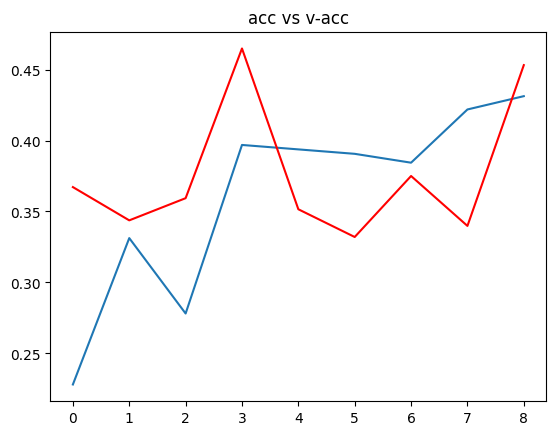

In [21]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

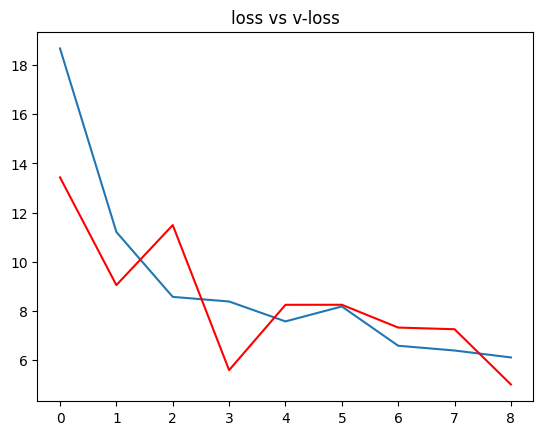

In [22]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [23]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
 the image is of neutral


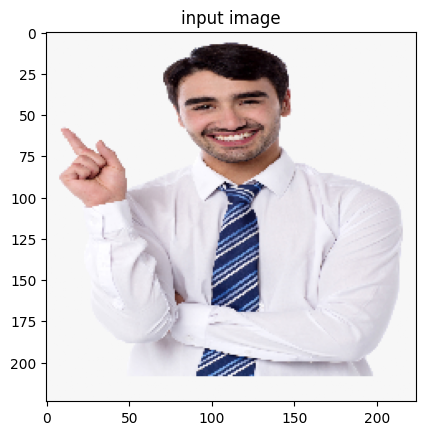

In [25]:
# path for the image to see if it predics correct class

path = "/content/9-99609_man-stock-photo-png-transparent-png.png"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
 the image is of fear


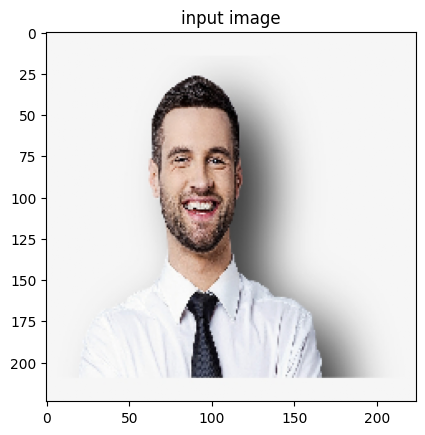

In [26]:
# path for the image to see if it predics correct class

path = "/content/65-658471_happy-man-happy-man-face-png.png"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()